<a href="https://colab.research.google.com/github/FerdousJUST/ImageClassificationCoding-2023-/blob/main/ImageClassificationCode03(RF)(2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import os
import seaborn as sns

In [2]:
print(os.listdir("/content/drive/MyDrive/Image_Classification_Dataset/"))

['Validation New', 'Training', 'Validation', 'valid_test_data', 'Training New']


In [3]:

SIZE = 128

In [4]:
train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Image_Classification_Dataset/Training New/*"):
    label = directory_path.split("/")[-1]
    print(label)
    #for img_path in glob.glob(os.path.join(directory_path)):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
       # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

Barbel_Fish
Tilapia_Fish
Spotted_Snakehead_Fish
Hilsha_Fish


In [5]:
train_images.shape
train_labels.shape

(4800,)

In [7]:
train_images.shape

(4800, 128, 128, 3)

In [6]:
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Image_Classification_Dataset/Validation New/*"):
    fruit_label = directory_path.split("/")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

Spotted_Snakehead_Fish
Hilsha_Fish
Tilapia_Fish
Barbel_Fish


In [8]:
test_images.shape

(1200, 128, 128, 3)

In [9]:

test_labels.shape

(1200,)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [11]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
x_train.shape

(4800, 128, 128, 3)

In [15]:
x_test.shape

(1200, 128, 128, 3)

In [16]:
y_train.shape

(4800,)

In [17]:
y_test.shape

(1200,)

In [18]:
#One hot encode y values for neural network.
from keras.utils import to_categorical
#y_train_one_hot = to_categorical(y_train,num_classes = 4,dtype="uint8")
#y_test_one_hot = to_categorical(y_test,num_classes = 4,dtype="uint8")
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [19]:
y_train_one_hot.shape

(4800, 4)

In [20]:
y_test_one_hot.shape

(1200, 4)

In [21]:
activation = 'softmax'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
#feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
#feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [22]:
x = feature_extractor.output
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [23]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                             

In [25]:

#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot))

Epoch 1/50
150/150 [==============================] - 9s 58ms/step - loss: 1.3866 - accuracy: 0.2369 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/50
150/150 [==============================] - 8s 55ms/step - loss: 1.3866 - accuracy: 0.2323 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/50
150/150 [==============================] - 9s 58ms/step - loss: 1.3865 - accuracy: 0.2469 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/50
150/150 [==============================] - 9s 58ms/step - loss: 1.3865 - accuracy: 0.2471 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/50
150/150 [==============================] - 9s 59ms/step - loss: 1.3865 - accuracy: 0.2458 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/50
150/150 [==============================] - 9s 59ms/step - loss: 1.3866 - accuracy: 0.2367 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/50
150/150 [==============================] - 8s 56ms/step - loss: 1.3865 - accuracy: 0.2342 - val_loss: 1.3863 - val_accuracy: 0.2500

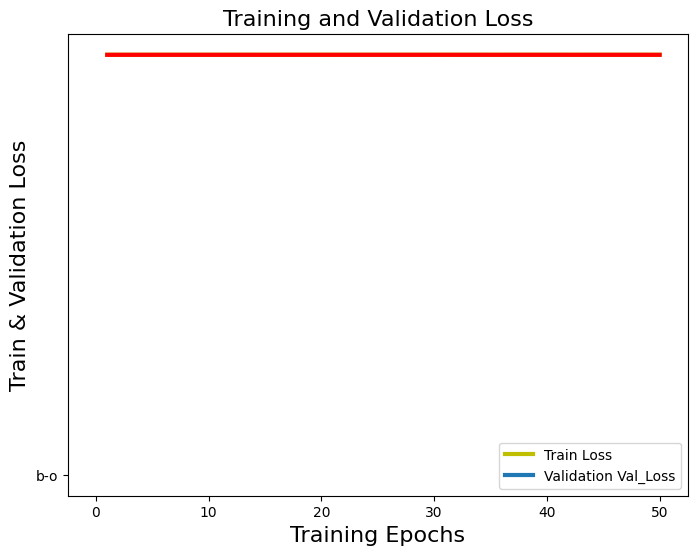

In [29]:
plt.figure(figsize = (8,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y','b-o', label='Training loss',linewidth=3.0)
plt.plot(epochs, val_loss, 'r','b-o', label='Validation loss',linewidth=3.0)
plt.title('Training and Validation Loss',fontsize= 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Validation Loss",fontsize =16)
plt.legend(['Train Loss', 'Validation Val_Loss'], loc='lower right')
plt.show()

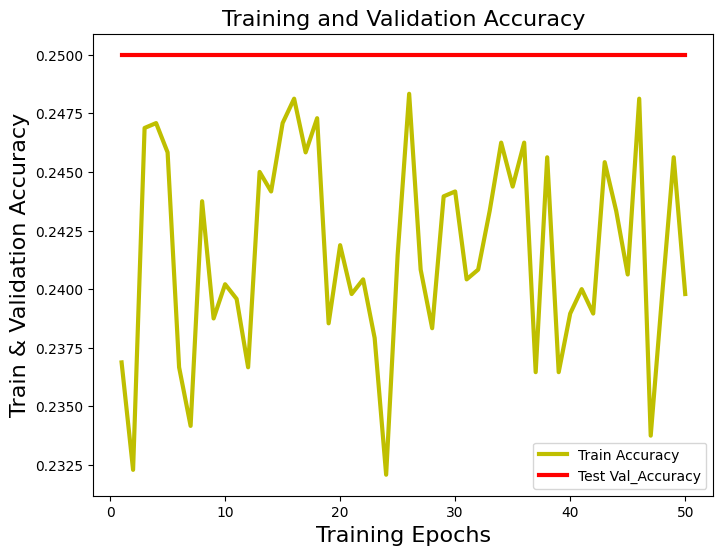

In [27]:
plt.figure(figsize = (8,6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label='Training acc',linewidth=3.0 )
plt.plot(epochs, val_acc, 'r', label='Validation acc',linewidth=3.0 )
plt.title('Training and Validation Accuracy',fontsize= 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Validation Accuracy",fontsize =16)
plt.legend(['Train Accuracy', 'Test Val_Accuracy'], loc='lower right')
plt.show()

In [30]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

38/38 [==============================] - 1s 20ms/step


[[  0   0 300   0]
 [  0   0 300   0]
 [  0   0 300   0]
 [  0   0 300   0]]


<Axes: >

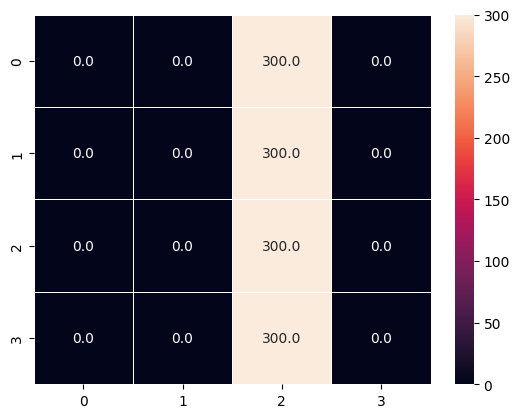

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True,
            fmt=".1f",
            linewidths=0.5,
            linecolor='white')

1/1 [==============================] - 0s 46ms/step
The prediction for this image is:  ['Spotted_Snakehead_Fish']
The actual label for this image is:  Spotted_Snakehead_Fish


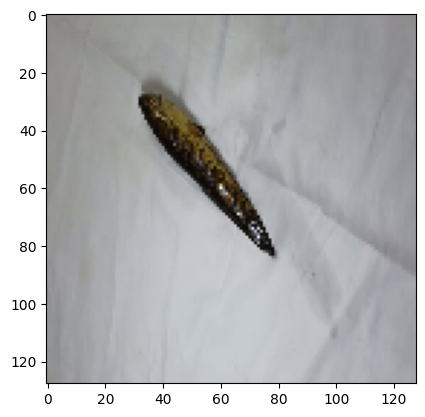

In [36]:
n=49  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [37]:
X_for_RF = feature_extractor.predict(x_train)

150/150 [==============================] - 3s 17ms/step


In [38]:

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 500, random_state = 80)

In [39]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=500, random_state=80)

In [40]:

#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)

38/38 [==============================] - 1s 18ms/step


In [41]:

X_test_feature.shape
prediction_RF = RF_model.predict(X_test_feature)
prediction_RF.shape

(1200,)

In [42]:
#Inverse le transform to get original label back.
prediction_RF = le.inverse_transform(prediction_RF)

In [43]:
test_labels.shape

prediction_RF.shape

(1200,)

In [44]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.9416666666666667


<Axes: >

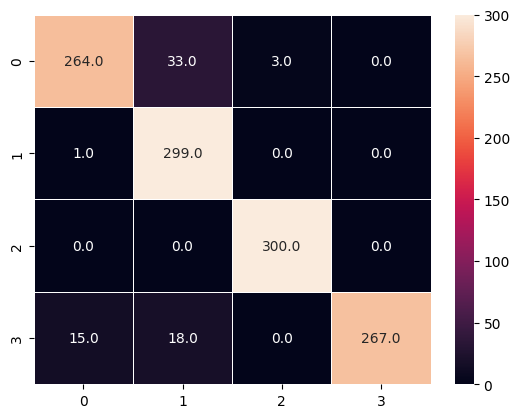

In [45]:

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True,
            fmt=".1f",
            linewidths=0.5,
            linecolor='white'
            )

1/1 [==============================] - 0s 97ms/step
The prediction for this image is:  ['Hilsha_Fish']
The actual label for this image is:  Hilsha_Fish


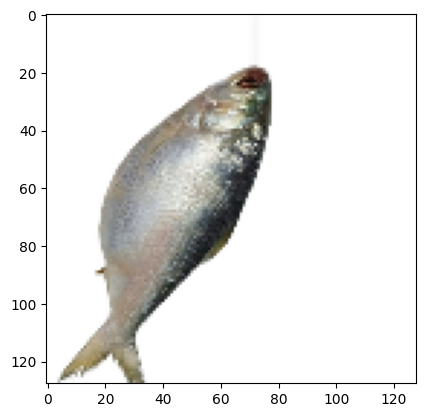

In [47]:
n=339 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])